# Logistic Regression with Tensorflow

### Import Packages and set randomizer

In [3]:
#Import packages 
import tensorflow as tf
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

#Set randomizer seed for consistent results
np.random.seed(1)

#Reset Graph 
tf.reset_default_graph()


### Generate and Visualise  Data 

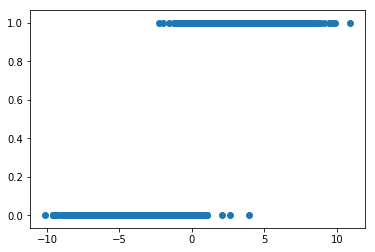

In [4]:
# Generate Data
x1 = np.random.normal(-4, 2, 1000)
x2 = np.random.normal(4, 2, 1000)
xs = np.append(x1, x2)
ys = np.asarray([0.] * len(x1) + [1.] * len(x2))

#Visualise the data 
plt.scatter(xs, ys)


## Build the Tensorflow model

### Reset Graph (run when changed graph)

In [5]:
tf.reset_default_graph()

### Create placeholders and variables

In [6]:
#Create placeholders for data 
data_xs = tf.placeholder(tf.float64)
data_ys = tf.placeholder(tf.float64)

#Create Variables for parametres
ws = tf.get_variable(name="weights_s", shape=[], dtype=tf.float64, initializer=tf.constant_initializer(0.5))
bs = tf.get_variable(name="bias_s", shape=[], dtype=tf.float64, initializer=tf.constant_initializer(-1.0))


### Specify Model, Loss function and Optimiser

In [7]:
#Model using Sigmoid Activation Function
ys_predicted = tf.sigmoid(tf.add(tf.multiply(data_xs,ws), bs)) #tf.multiply is element-wise multiplication

#Cross entropy loss function
sloss = tf.reduce_mean(-ys * tf.log(ys_predicted) - (1-ys)*tf.log(1-ys_predicted))

#Gradient descent optimiser with learning rate 0.01
optimiser = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(sloss)


### Train the model and plot loss function

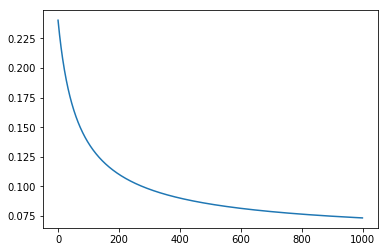

In [8]:
step = 1000 # total number of iterations 

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  loss_list = []
  for i in range (step):
    _, l = sess.run([optimiser, sloss], feed_dict={data_xs: xs, data_ys: ys})
    loss_list.append(l) # save the loss at each iteration for plot so you can visualise the training process

  ws_val, bs_val = sess.run([ws,bs])
    
#Plot the value of the loss function during training
p = np.arange(step)
plt.plot(p, loss_list)

### Plot the trained Model 

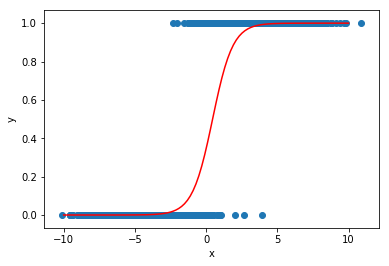

In [12]:
#Define plot function
def plot_prediction(xs, ys, ws_val, b_val):
    all_xs = np.linspace(-10., 10., 100)
    with tf.Session() as sess:
        #predicted_vals = tf.sigmoid(tf.add(tf.multiply(ws,all_xs), bs))
        predicted_vals = tf.sigmoid(all_xs * ws_val + b_val).eval()
    plt.plot(all_xs, predicted_vals, 'r')
    plt.scatter(xs, ys)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

#Run plot function
plot_prediction(xs, ys, ws_val, bs_val)